# **Unveiling Gender Bias: Statistical Analyses of Salary Prediction Data**
### *By Dr. Adnan Masood*

## **Purpose of this Notebook**
In this notebook, we will explore salary data and see if there is any difference in salaries for people based on their gender. We will do several simple analyses to see if there is any unfairness in how salaries are distributed.

We are using simple explanations so that complex ideas become easier to digest:
- We will break down statistical methods, such as t-tests, into simpler terms.
- We will showcase various data visualizations to spot any inequality or bias.
- We will also look into how to potentially fix or reduce bias (called **debiasing**), with ample detail provided so each step is clear.


## **Why This Matters**
Bias in data can lead to unfair outcomes, especially if a model or decision-making process is built on biased information. By investigating data:
- We can **identify** if one group is at a disadvantage.
- We can **measure** how large that disadvantage might be.
- We can **rectify** or reduce that disadvantage using **debiasing** techniques.

When salaries are in question, addressing bias ensures fair pay practices and helps foster workplace equality.

## **Importing Libraries**
We will use the following Python libraries:
- **pandas** for data manipulation (tables, CSV reading, etc.)
- **numpy** for numerical operations and array handling
- **matplotlib** and **seaborn** for data visualization (plots, histograms, etc.)
- **scipy.stats** for statistical tests such as t-tests and Theil index calculations

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import entropy

/home/nightwing/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## **1. Dataset Description**
We will load the dataset and do a quick examination of its structure. Specifically:
1. **Peek at the first few rows** to understand how the data is organized.
2. **Check summary statistics** (like mean, min, max) to detect any anomalies.
3. **Verify data types** to confirm columns that we think are numeric are indeed numeric.
4. **Look for missing values** because they can cause problems in analysis or model training.

In [2]:
# 1. Import necessary libraries
import pandas as pd
import kagglehub
import os

# 2. Download the dataset
mohithsairamreddy_salary_data_path = kagglehub.dataset_download('mohithsairamreddy/salary-data')
print('Data source import complete.')

# 3. List what was downloaded (optional, for checking)
print("Folder path:", mohithsairamreddy_salary_data_path)
print("Contents:", os.listdir(mohithsairamreddy_salary_data_path))

# 4. Construct the path to the CSV file
csv_path = os.path.join(mohithsairamreddy_salary_data_path, "Salary_Data.csv")

# 5. Load into a DataFrame
salary_df = pd.read_csv(csv_path)

# 6. Inspect the dataframe
salary_df.head()

Data source import complete.
Folder path: /home/nightwing/.cache/kagglehub/datasets/mohithsairamreddy/salary-data/versions/4
Contents: ['Salary_Data.csv']


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### **Summary Statistics**
Summary statistics show us how each column is distributed. For example, we can see **mean** salary, **minimum** and **maximum** salary, and also **standard deviation**, which tells us how spread out the salaries are.

In [3]:
# TODO: Create separate DataFrames for males (male_df) and females (female_df)
# Hint: Filter salary_df by salary_df['Gender'] == 'Male' or 'Female'
male_df = salary_df[salary_df["Gender"] == "Male"]
female_df = salary_df[salary_df["Gender"] == "Female"]

In [4]:
# TODO: Count how many total examples in the dataset
# Hint: Use len(salary_df)
total_count = len(salary_df)

# TODO: Count how many in each group
# Hint: Use len(male_df) and len(female_df)
male_count = len(male_df)   
female_count = len(female_df)

# TODO: Current (observed) proportions
male_prop = male_count / total_count
female_prop = female_count / total_count

print("Current male proportion:", male_prop)
print("Current female proportion:", female_prop)

Current male proportion: 0.5480310262529833
Current female proportion: 0.449582338902148


In [5]:
# TODO: Use salary_df.describe() to see the data summary.
# HINT: dataset_summary = salary_df.describe()

##################
# Fill in below:
##################
dataset_summary = salary_df.describe()
print("Summary Statistics of the Salary Prediction Dataset:")
dataset_summary

Summary Statistics of the Salary Prediction Dataset:


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


### **Check Data Types**
We want to confirm which columns are numeric (like `Salary`) and which are categorical (like `Gender`). This helps ensure later steps (like building models) won't fail due to incorrect data types.

In [6]:
# TODO: Check the dtypes of columns using .dtypes.
# For example: salary_df.dtypes

##################
# Fill in below:
##################
salary_df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

### **Check for Missing Values**
Missing data can arise if an employee's salary or years of experience wasn't recorded. We can address these by dropping rows or filling them if we have a valid strategy.

In [7]:
# TODO: Check for missing values.
# We can do: salary_df.isnull().sum() to see how many missing values exist in each column.

##################
# Fill in below:
##################
null_values = salary_df.isnull().sum()
print(null_values)

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [8]:
# TODO: If needed, drop or fix those missing values.
# You might use salary_df.dropna() to just remove them, or fill them in with some average.

##################
# Fill in below:
##################
salary_df = salary_df.dropna()

# Double-check null values again:
null_values = salary_df.isnull().sum()
print(null_values)

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


## **2. Exploratory Data Analysis (EDA)**
In this phase, we visualize the data using charts. The idea is to see the distribution of each variable and spot any big differences between groups. By simply looking at these visual plots, we can gain immediate intuition about potential biases.

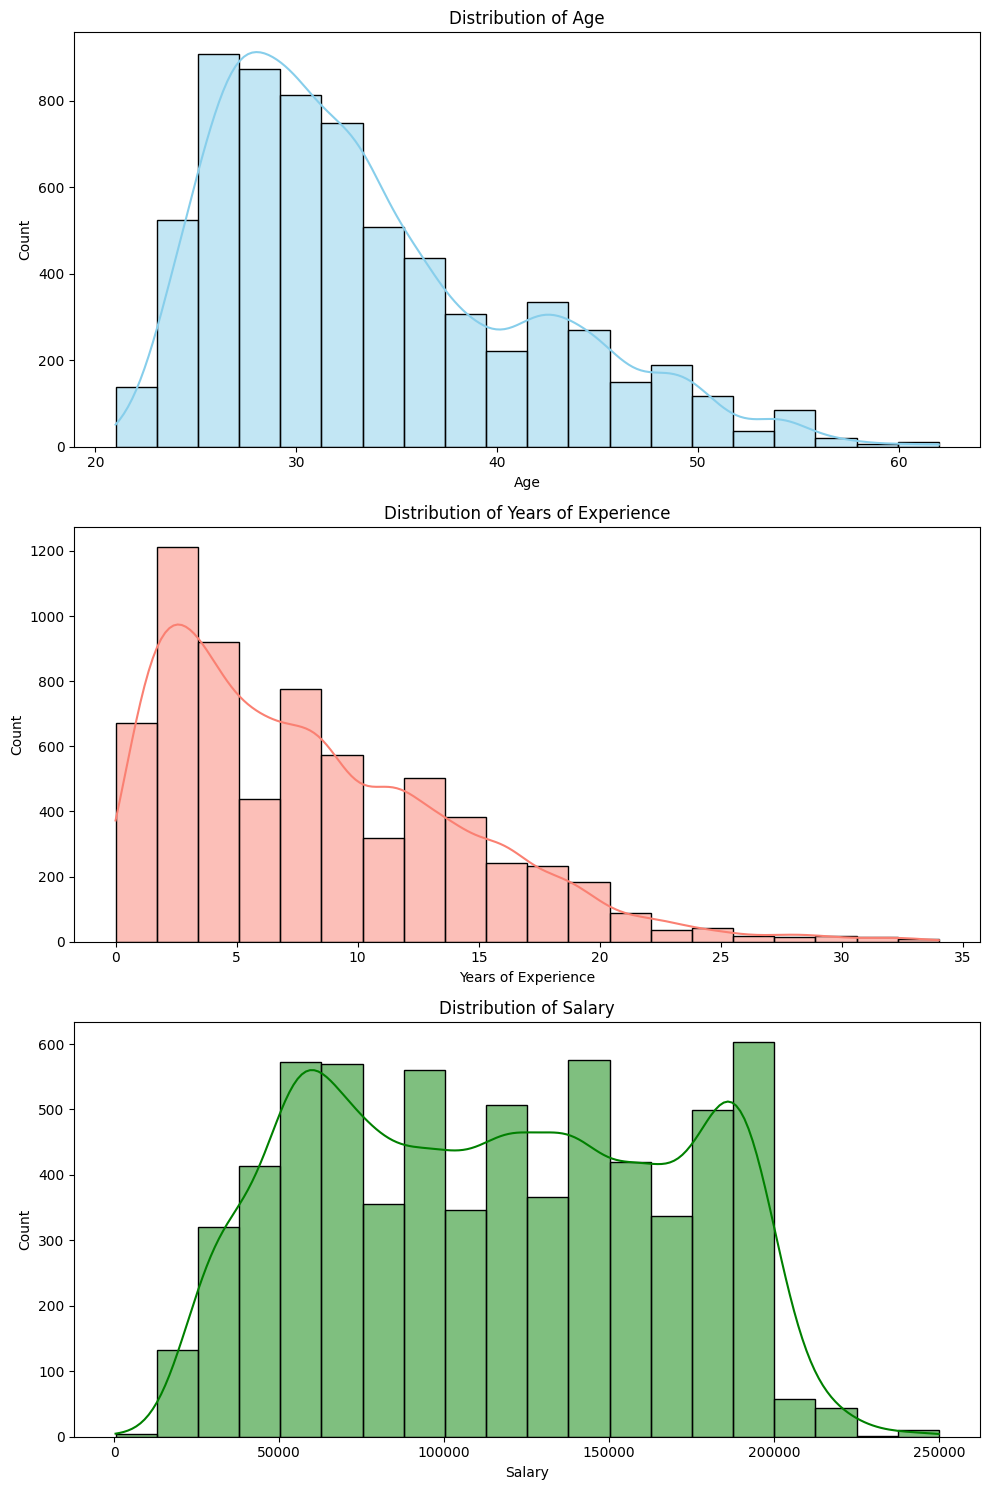

In [9]:
# Histograms
# ELI5: A histogram counts how many data points fall into each interval ('bucket').
# We can see if the data is skewed or if there's a wide/narrow range.

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.histplot(salary_df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

sns.histplot(salary_df['Years of Experience'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Years of Experience')

sns.histplot(salary_df['Salary'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Salary')

plt.tight_layout()
plt.show()

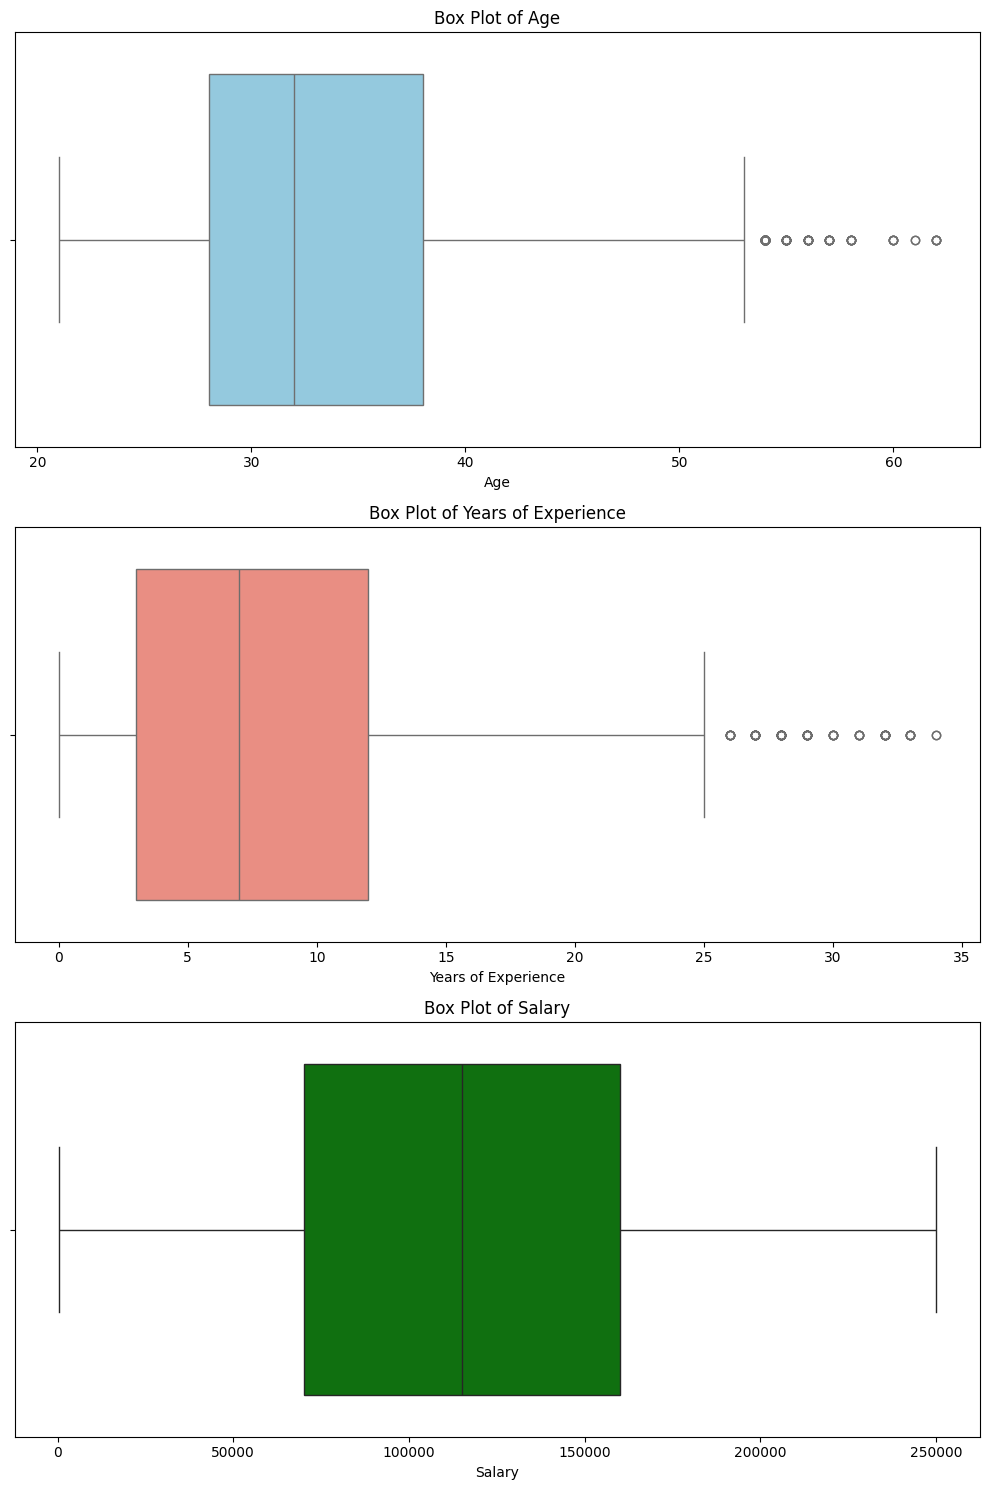

In [10]:
# Box plots
# ELI5: A box plot helps us see quartiles and outliers.
# The box shows where the bulk of the data is, and the 'whiskers' can show extremes.

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.boxplot(x=salary_df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(x=salary_df['Years of Experience'], ax=axes[1], color='salmon')
axes[1].set_title('Box Plot of Years of Experience')

sns.boxplot(x=salary_df['Salary'], ax=axes[2], color='green')
axes[2].set_title('Box Plot of Salary')

plt.tight_layout()
plt.show()

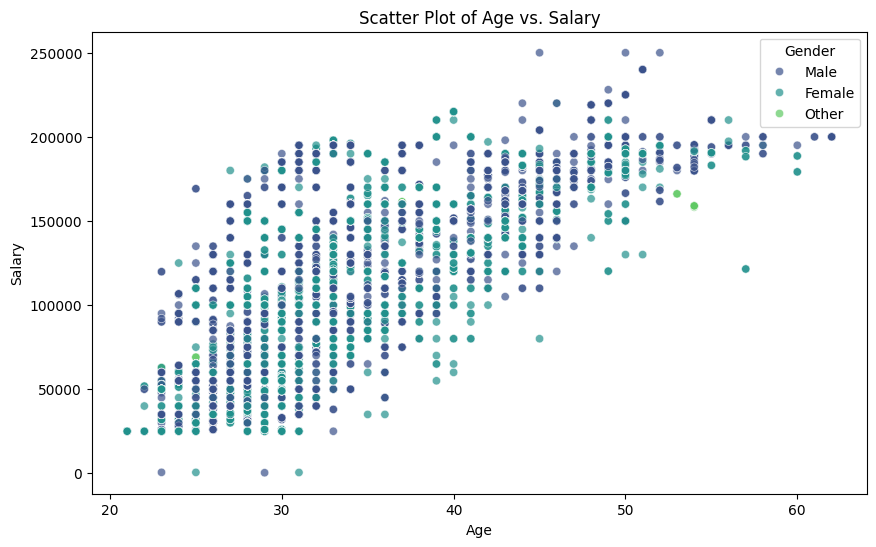

In [11]:
# Scatter plot for Age vs. Salary
# Here, each dot is an employee.
# We color them by Gender so we can see if one group tends to cluster in certain areas.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=salary_df, hue='Gender', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Age vs. Salary')
plt.show()

### **Gender-Related Visualizations**
Next, let's see how many males vs. females are in the dataset, and also how their years of experience, age, and salaries compare. This helps us detect if one group might be underrepresented or might systematically earn more.

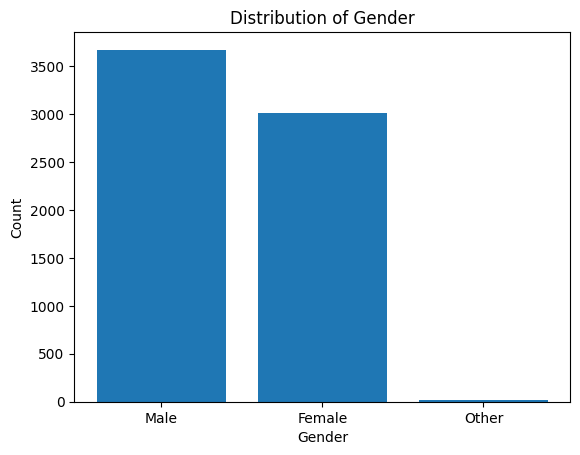

In [12]:
gender_counts = salary_df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

/tmp/ipykernel_131550/3482766591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Years of Experience', data=salary_df, palette='Set2')


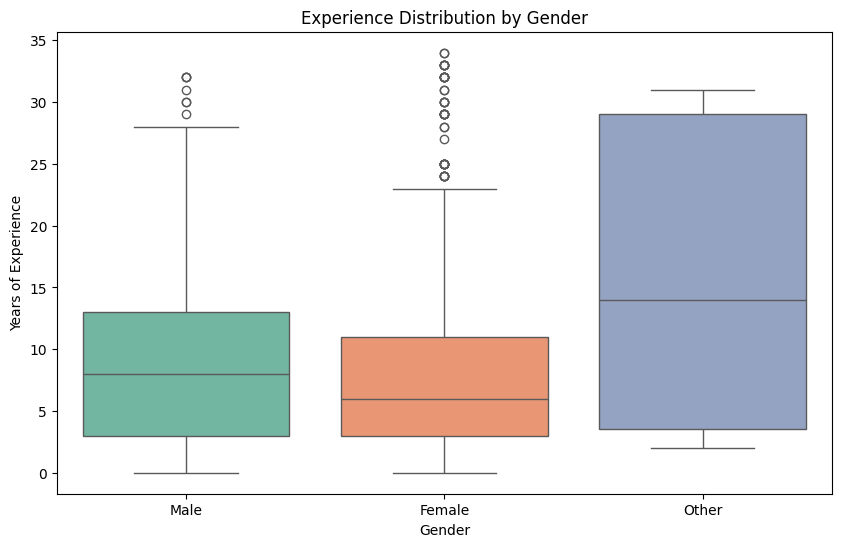

In [13]:
# Check the distribution of Years of Experience grouped by Gender.
# This can show if one group typically has more or less experience.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Years of Experience', data=salary_df, palette='Set2')
plt.title('Experience Distribution by Gender')
plt.show()

/tmp/ipykernel_131550/289231376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Age', data=salary_df, palette='Set2')


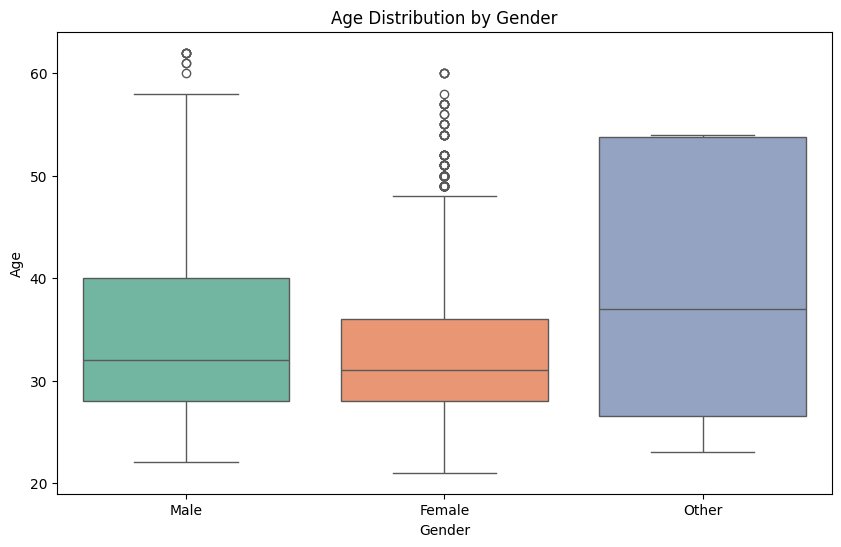

In [14]:
# Check the distribution of Age grouped by Gender.
# If there's a big age difference between groups, it might also affect salaries.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=salary_df, palette='Set2')
plt.title('Age Distribution by Gender')
plt.show()

/tmp/ipykernel_131550/2008608909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=salary_df, palette='Set2')


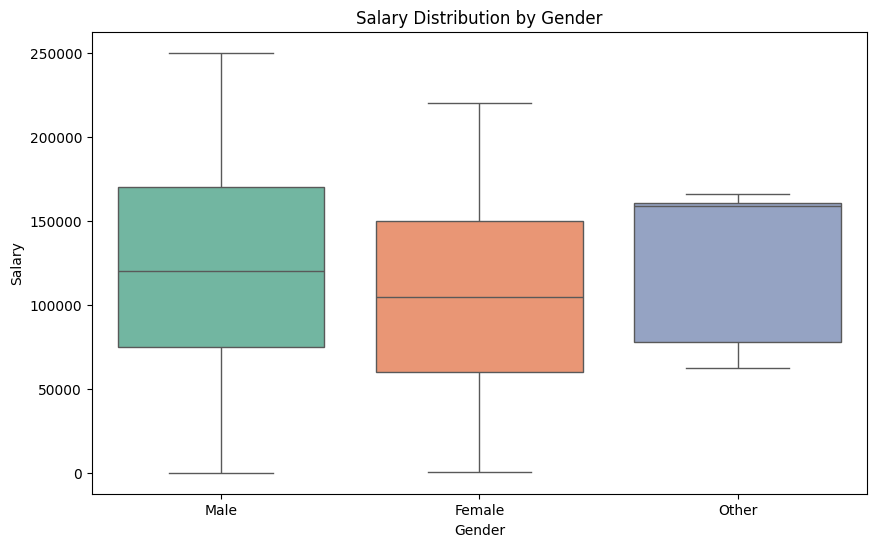

In [15]:
# Check how Salary is distributed by Gender.
# A big shift in the box/whiskers might indicate a pay gap.

plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=salary_df, palette='Set2')
plt.title('Salary Distribution by Gender')
plt.show()

## **3. Descriptive Statistics by Gender**
Seeing basic numeric descriptions (like count, mean, median, etc.) for each gender can tell us if the average salary is drastically different. We also look at how consistent these salaries are (using standard deviation).

In [16]:
gender_groups = salary_df.groupby('Gender')['Age']
summary_statistics = gender_groups.agg(['count', 'mean', 'median', 'std'])
print("Summary Statistics for Age by Gender:")
summary_statistics

Summary Statistics for Age by Gender:


,count,mean,median,std
Gender,,,,
Female,3013,32.626286,31.0,6.976178
Male,3671,34.418415,32.0,7.979936
Other,14,39.571429,37.0,13.380320


### **Salary Stats by Gender**
This is especially pertinent since we are looking for a potential salary gap.

In [17]:
gender_groups = salary_df.groupby('Gender')['Salary']
summary_statistics = gender_groups.agg(['count', 'mean', 'median', 'std'])
print("Summary Statistics for Salary by Gender:")
summary_statistics

Summary Statistics for Salary by Gender:


,count,mean,median,std
Gender,,,,
Female,3013,107888.998672,105000.0,52723.610035
Male,3671,121395.697630,120000.0,52098.626225
Other,14,125869.857143,158610.0,44242.382776


## **4. Hypothesis Testing**
### **T-Test**
We use a two-sample t-test to see if the average salary for males is significantly different from the average salary for females. In simpler terms:
- **Null Hypothesis (H0):** "There is no difference in salary based on gender."
- **Alternative Hypothesis (H1):** "There is a difference in salary based on gender."

If the p-value is below a typical threshold (like 0.05), it suggests the difference is not just due to random chance.

In [18]:
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

t_stat, p_value = ttest_ind(male_salaries, female_salaries)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Salaries differ significantly by gender.")
else:
    print("Fail to reject the null hypothesis. No significant difference found.")

T-Statistic: 10.489305680117718
P-Value: 1.5264743340303035e-25
Reject the null hypothesis. Salaries differ significantly by gender.


### **Cohen's d**
While a t-test determines if the difference is statistically significant, **Cohen's d** tells us how large or meaningful that difference is:
- ~0.2 = small effect
- ~0.5 = medium effect
- ~0.8 (or above) = large effect


In [19]:
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

t_stat, p_value = ttest_ind(male_salaries, female_salaries)
mean_difference = male_salaries.mean() - female_salaries.mean()
pooled_std_dev = (
    ((len(male_salaries) - 1) * male_salaries.var()) + ((len(female_salaries) - 1) * female_salaries.var())
) / (len(male_salaries) + len(female_salaries) - 2)
cohen_d = mean_difference / (pooled_std_dev ** 0.5)

print(f"Cohen's d: {cohen_d}")

Cohen's d: 0.2578536030939307


## **5. Theil Index**
The **Theil Index** is an entropy measure that shows how unequal or uneven a distribution is. If the Theil Index is very high for one group, that group’s salaries might have a wider spread of values (some extremely high, some extremely low).

In [20]:
male_salaries = salary_df[salary_df['Gender'] == 'Male']['Salary']
female_salaries = salary_df[salary_df['Gender'] == 'Female']['Salary']

theil_male = entropy(male_salaries)
theil_female = entropy(female_salaries)
print(f"Theil Index for Male: {theil_male}")
print(f"Theil Index for Female: {theil_female}")

Theil Index for Male: 8.109797060138703
Theil Index for Female: 7.883871535489255


## **6. Demographic Parity**
Demographic parity checks if each group has about the same rate of a “positive outcome.” Here, we define crossing a certain salary threshold (e.g., $100k) as that outcome. If one group is significantly less likely to cross that threshold, that might indicate a biased scenario.

In [21]:
salary_threshold = 100000
salary_df.loc[:, 'Outcome'] = (salary_df['Salary'] > salary_threshold).astype(int)

male_data = salary_df[salary_df['Gender'] == 'Male']
female_data = salary_df[salary_df['Gender'] == 'Female']

parity_male = male_data['Outcome'].mean()
parity_female = female_data['Outcome'].mean()

print(f"Demographic Parity for Male: {parity_male}")
print(f"Demographic Parity for Female: {parity_female}")

Demographic Parity for Male: 0.5965676927267775
Demographic Parity for Female: 0.5217391304347826


## **7. Disparate Impact**
Disparate impact looks at the ratio of positive outcomes for a group relative to the overall positive outcome rate. If the ratio is close to 1, it suggests fairness. A ratio much below (or above) 1 signals potential bias.

In [22]:
male_data = salary_df[salary_df['Gender'] == 'Male']
female_data = salary_df[salary_df['Gender'] == 'Female']

disparate_impact_male = male_data['Outcome'].mean() / salary_df['Outcome'].mean()
disparate_impact_female = female_data['Outcome'].mean() / salary_df['Outcome'].mean()

print(f"Disparate Impact for Male: {disparate_impact_male}")
print(f"Disparate Impact for Female: {disparate_impact_female}")

Disparate Impact for Male: 1.0593346781240602
Disparate Impact for Female: 0.9264604177232698


# **Exercise 1: Train a Simple Model to Predict Salary**
In this exercise, we will create a straightforward regression model that tries to predict an employee’s salary based on their attributes. Once the model is trained, we will pass in the same values for age and years of experience, but only change the **Gender** from female to male to see if the model gives different salary predictions.

**Goal:**
1. Split the data into features (Age, Experience, Gender, etc.) and the target (Salary).
2. Fit a regression model (like Linear Regression).
3. Predict the salary for a hypothetical person with certain parameters:
   - Age = 30
   - Years of Experience = 5
   - Gender = Female
4. Predict the salary for the **same** parameters except Gender = Male.
5. Compare the results to see how big the difference is.

### **Hints**
- You might use `train_test_split` from `sklearn.model_selection` to break data into training and testing sets.
- You might use `LinearRegression` from `sklearn.linear_model`.
- Be sure to handle the `Gender` column properly. Convert it to numeric if needed (e.g., 0 for Female, 1 for Male).

Examining these differences helps us identify if the model is learning a gender-based bias.

In [23]:
# TODO: Implement your model training
# Steps:
# 1. Select relevant features from salary_df (Age, Years of Experience, Gender?).
# 2. Convert Gender to numeric if necessary (like using pd.get_dummies).
# 3. Split into train/test.
# 4. Fit a LinearRegression.
# 5. Make predictions for two hypothetical individuals (same Age, same Years of Exp, different Gender).
# 6. Print out both predicted salaries.

##############################################
# EXERCISE: Fill in your code below
##############################################

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

# 1. Prepare X, y
# 2. train_test_split
# 3. model.fit
# 4. hypothetical_female = ...
# 5. hypothetical_male = ...
# 6. Compare results

# TODO: Complete below.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Prepare X, y
# Convert Gender to numeric (0 for Female, 1 for Male)
salary_df['Gender'] = salary_df['Gender'].map({'Female': 0, 'Male': 1})
salary_df = salary_df.dropna(subset=["Gender"])
X = salary_df[["Age", "Years of Experience", "Gender"]]
y = salary_df["Salary"]

# 2. train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. model.fit
model = LinearRegression()
model.fit(X_train, y_train)

# 4 + 5. hypothetical individuals (same Age, same Years of Exp)
hypothetical_male = np.array([[30, 5, 1]])
hypothetical_female = np.array([[30, 5, 0]])

# 6. Predict
male_salary = model.predict(hypothetical_male)[0]
female_salary = model.predict(hypothetical_female)[0]

print(f"Predicted salary for Female (Age 30, Experience 5): {female_salary}")
print(f"Predicted salary for Male (Age 30, Experience 5): {male_salary}")
print(f"Salary Difference: {male_salary - female_salary}")

Predicted salary for Female (Age 30, Experience 5): 90529.28285168824
Predicted salary for Male (Age 30, Experience 5): 96026.933099897
Salary Difference: 5497.650248208753


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


After you run these predictions, note the difference between male and female salaries for the exact same input attributes (other than gender). If there is a gap, it may reflect biases in the data or how the model interprets those data points.

# **Exercise 2: Debias the Dataset (Using a Reweighing Approach)**
# TODO-  Students, to complete this part, you must move all the code into code cells, and run it.

You will use a **reweighing** strategy to ensure each gender group receives a fairer representation during the training process. This method assigns **larger weights** to underrepresented or disadvantaged groups so the model pays more "attention" to them when learning.

## **What is Reweighing?**
- **Goal:** Adjust the importance of training examples so that the dataset no longer (or less) reflects historical imbalances.
- **Mechanism:**  
  1. Identify each record’s *group* (e.g., "Male" or "Female").  
  2. Compute how often that group occurs vs. how often it *should* occur under "perfect fairness" assumptions.  
  3. Apply a *weight* to each record inversely proportional to how over- or underrepresented it is.

By doing this, we do **not** remove any columns, and the model can still see the `Gender`. But it “pays more attention” to the minority group’s samples to reduce bias from historical imbalance.

## **Detailed Steps**
### **1. Separate the Dataset by Gender**
```python
import pandas as pd

# Suppose salary_df is your original DataFrame with columns like:
# ['Age', 'Years of Experience', 'Gender', 'Salary']

male_df = salary_df[salary_df['Gender'] == 'Male']
female_df = salary_df[salary_df['Gender'] == 'Female']
```
1. We split into subsets for each group. If there are more categories (e.g., Non-binary/Other), you’d extend this logic accordingly.

### **2. Calculate Group Proportions**
```python
# Count how many total examples in the dataset
total_count = len(salary_df)

# Count how many in each group
male_count = len(male_df)
female_count = len(female_df)

# Current (observed) proportions
male_prop = male_count / total_count
female_prop = female_count / total_count

print("Current male proportion:", male_prop)
print("Current female proportion:", female_prop)
```

### **3. Decide on "Desired" Proportions**
```python
desired_male_prop = 0.5
desired_female_prop = 0.5
```
Typically, we aim for a balanced representation (50-50) or whatever distribution we believe is fair.

### **4. Compute the Weights**
```python
weight_for_male   = desired_male_prop   / male_prop
weight_for_female = desired_female_prop / female_prop

print("Weight for male samples:", weight_for_male)
print("Weight for female samples:", weight_for_female)
```
These weights tell us how much to up- or down-weight each record. If a group is overrepresented, that group’s weight is < 1. If underrepresented, weight is > 1.

### **5. Assign Weights to Each Row**
```python
salary_df['sample_weight'] = salary_df['Gender'].apply(
    lambda g: weight_for_male if g == 'Male' else weight_for_female
)
```
Now every row has a numeric `sample_weight` that indicates how strongly it should influence the model’s training.

### **6. Train a Model with `sample_weight`**
```python
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Suppose we want to predict 'Salary' from ['Age', 'Years of Experience', 'Gender'].
# 1. Separate features (X) and target (y).
X = salary_df[['Age', 'Years of Experience', 'Gender']]  # or encode Gender in numeric form if needed
y = salary_df['Salary']

# 2. Train-test split
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, salary_df['sample_weight'], test_size=0.2, random_state=42
)

# 3. Create and train the model
model = LinearRegression()
model.fit(X_train, y_train, sample_weight=w_train)  # <-- important step

# 4. Evaluate the model
score = model.score(X_test, y_test, sample_weight=w_test)
print("Model R^2 on test data (with reweighing):", score)
```
The model now sees that female samples might have higher weight if they were underrepresented. This can help reduce biases that would favor the majority group.

### **7. TODO Compare Predictions for Male vs. Female**
You can again do a hypothetical input test (e.g., Age=30, Experience=5) and vary `Gender` from "Male" to "Female" to observe whether the difference in predicted salary is smaller now than it was **before** reweighing.



In [28]:
#TODO

import pandas as pd


# Get the exact columns from the training set
feature_columns = X_train.columns

# Create an empty male and female input based on those columns
male_input = pd.DataFrame(columns=feature_columns)
female_input = pd.DataFrame(columns=feature_columns)

salary_df = salary_df.dropna(subset=["Gender"])

ideal_male_prop = ideal_female_prop = 0.5

male_weight = ideal_male_prop / male_prop
female_weight = ideal_female_prop / female_prop

salary_df['Weight'] = 0.0
salary_df.loc[salary_df["Gender"] == 1, 'Weight'] = male_weight
salary_df.loc[salary_df["Gender"] == 0, 'Weight'] = female_weight

X = salary_df[["Age", "Years of Experience", "Gender"]]
y = salary_df["Salary"]

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, salary_df['Weight'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train, sample_weight=weights_train)

hypothetical_male = np.array([[30, 5, 1]])
hypothetical_female = np.array([[30, 5, 0]])

male_pred = model.predict(hypothetical_male)[0]
female_pred = model.predict(hypothetical_female)[0]

# # Fill in values for the male example
# male_input['Age'] = 25
# male_input['Years of Experience'] = 2
# male_input['Gender_Male'] = 1  # or set accordingly based on your encoding

# # Fill in values for the female example
# female_input['Age'] = 25
# female_input['Years of Experience'] = 2
# female_input['Gender_Male'] = 0

# # Predict
# male_pred = model.predict(male_input)[0]
# female_pred = model.predict(female_input)[0]

print("Male prediction:", male_pred)
print("Female prediction:", female_pred)
print("Difference (Male - Female):", male_pred - female_pred)

# You must show improved results here.

Male prediction: 96077.46785547165
Female prediction: 90516.07760474231
Difference (Male - Female): 5561.390250729339


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## **Key Takeaways**
- **Reweighing** is a *pre-processing* fairness strategy. By adjusting the importance of each record, the model becomes more balanced towards the desired distribution.
- **This approach** does not hide `Gender` from the model. Instead, it leverages the gender information to correct representation.
- While reweighing can reduce group-level bias, it does *not* guarantee fairness on every individual level. Other advanced methods or fairness libraries like **Fairlearn** or **AIF360** may be used for more comprehensive solutions.

By carefully **reweighing** the samples, we can help the model treat underrepresented groups more fairly, potentially reducing the pay gap it predicts for different genders.

In [29]:
import os, sys, platform, datetime, uuid, socket

def signoff(name="Anonymous"):
    colab_check = "Yes" if 'google.colab' in sys.modules else "No"
    mac_addr = ':'.join(format((uuid.getnode() >> i) & 0xff, '02x') for i in reversed(range(0, 48, 8)))
    print("+++ Acknowledgement +++")
    print(f"Executed on: {datetime.datetime.now()}")
    print(f"In Google Colab: {colab_check}")
    print(f"System info: {platform.system()} {platform.release()}")
    print(f"Node name: {platform.node()}")
    print(f"MAC address: {mac_addr}")
    try:
        print(f"IP address: {socket.gethostbyname(socket.gethostname())}")
    except:
        print("IP address: Unknown")
    print(f"Signing off, {name}")

signoff("Ali Muhammad Asad")

+++ Acknowledgement +++
Executed on: 2025-02-09 02:56:24.767588
In Google Colab: No
System info: Linux 6.8.0-52-generic
Node name: alimuhammad-Inspiron-7559
MAC address: 20:47:47:74:94:05
IP address: 127.0.1.1
Signing off, Ali Muhammad Asad
